## Prerequisites

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.colors as colors

# data preparation and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# model regresi
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

Read Dataset, dari data train buat dipake bikin model hingga dievaluasi, kemudian pada diterapkan pada data beneran, yaitu data productionnya

In [ ]:
# dataframe for sample use case
usecase_df = pd.read_csv('squark_automotive_CLV_training_data.csv')

# dataframe for real dataset
realcase_df = pd.read_csv('squark_automotive_CLV_production_data.csv')

## Data Inspection
Now, Let's jump into more deeper about the concept How to Apply Customer Lifetime Value Prediction And Here's the one of the Customer Lifetime Value Prediction Application on Marketing and Insurance Service in Automotive Sector Based on the domain that come from this data sample for this use case. The case began that Company want to Discover the Insurance Customer who give the best value to the company based on customer's spent, feature and product or service consumed that Affect Company Income that also make it more sustainable. So the Company want to predict the Customer who have High Value, in order to easily define the target market, appraising the high-valued customer, and Optimized the Marketing Strategy.


In [ ]:
# liat isi data dengan 5 baris teratas
usecase_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# liat jumlah baris dan kolom
usecase_df.shape

(9134, 24)

In [ ]:
# liat info dari dataset, datatype, jumlah non-null
usecase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

In [ ]:
# liat jumlah data kosong perbaris dari tiap kolom
usecase_df.isnull().sum()

Customer                         1035
State                            1035
Customer Lifetime Value          1035
Response                         1035
Coverage                         1035
Education                        1035
Effective To Date                1035
EmploymentStatus                 1035
Gender                           1035
Income                           1035
Location Code                    1035
Marital Status                   1035
Monthly Premium Auto             1035
Months Since Last Claim          1035
Months Since Policy Inception    1035
Number of Open Complaints        1035
Number of Policies               1035
Policy Type                      1035
Policy                           1035
Renew Offer Type                 1035
Sales Channel                    1035
Total Claim Amount               1035
Vehicle Class                    1035
Vehicle Size                     1035
dtype: int64

In [ ]:
# liat jumlah duplicate data perbaris dari tiap kolom
usecase_df[usecase_df.duplicated()].count()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

## Data Cleaning
kecacatan data berada pada missing value disemua kolom sebanyak 1035 baris, maka dihilangkan langsung

In [ ]:
# menghapus data kosong berdasarkan baris (0), hapus kalau ada (any)
usecase_df.dropna(axis=0, how='any', inplace=True)

In [ ]:
# mencari quantile
# def find_quantile(df, var, q1 = 0.05, q2 = 0.95):
#     # quantile rendah dengan q1 dan quantile tinggi dengan q2
#     lower_quantile = df[var].quantile(q1)
#     upper_quantile = df[var].quantile(q2)

#     # kembalikan nilai quantile rendah dan quantile tingginya
#     return lower_quantile, upper_quantile

# capping outlier
# def capping_outlier(df, var):
#     lower_quantile, upper_quantile = find_quantile(df, var)
#     df[var] = np.where(df[var] > upper_quantile, upper_quantile,
#                        np.where(df[var] < lower_quantile, lower_quantile, df[var]))

In [ ]:
# outlier_col = [col for col in usecase_df.columns if usecase_df[col].dtype!='object']

# for col in outlier_col:
    # capping_outlier(usecase_df, col)

### periksa kondisi data, dilanjutkan dengan statistika desriptive

In [ ]:
# liat jumlah data kosong perbaris dari tiap kolom
usecase_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
# liat info dari dataset, datatype, jumlah non-null
usecase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8099 entries, 0 to 8098
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

In [ ]:
# liat statistika deskriptif, secara default numerik
usecase_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000
mean,7556.635681,37600.550130,91.195950,15.055562,48.138659,0.361032,2.917768,417.678362
std,5144.951974,29920.525628,27.698158,9.939723,27.331697,0.804588,2.280720,237.453275
min,2472.181347,0.000000,62.000000,1.000000,5.000000,0.000000,1.000000,50.581167
25%,3974.498315,0.000000,68.000000,6.000000,25.000000,0.000000,1.000000,269.484578
50%,5780.182197,34430.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.167471
75%,8963.294993,62459.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,21924.996207,90334.900000,165.000000,33.000000,93.000000,3.000000,8.000000,955.200000


In [ ]:
# liat statistika deskriptif pada data kategorikal
usecase_df.describe(include=[object])

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099
unique,8099,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,Oregon,No,Basic,Bachelor,1/10/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,2475,6926,4931,2430,174,5079,4164,5098,4728,6053,3140,3324,3087,4110,5671


## Exploratory Data Analysis

buat function untuk visualisasi distribusi dengan histogram boxplot untuk univariate dan bivariate scatterplot 

In [ ]:
# function histogram boxplot untuk univariate
def histo_boxplot(df, col):
			fig, axs = plt.subplots(1, 2, figsize=(15, 5))

			# N is the count in each bin, bins is the lower-limit of the bin
			N, bins, patches = axs[0].hist(df[col], bins=50)
			
			# We'll color code by height, but you could use any scalar
			fracs = N / N.max()
			
			# we need to normalize the data to 0..1 for the full range of the colormap
			norm = colors.Normalize(fracs.min(), fracs.max())
			
			# Now, we'll loop through our objects and set the color of each accordingly
			for thisfrac, thispatch in zip(fracs, patches):
					color = plt.cm.viridis(norm(thisfrac))
					thispatch.set_facecolor(color)
			
			# We can also normalize our inputs by the total number of counts
			axs[1].boxplot(df[col])
			axs[0].set(xlabel=col, ylabel='', title= str(col) + ' Distribution')
			axs[1].set(xlabel=col, ylabel='', title= str(col) + ' Boxplot Distribution')
			# Now we format the y-axis to display percentage
			axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
  
# buat function scatterplot
def scatter_bivariate(df, var1, var2):
			f, axes = plt.subplots(1, 2,figsize=(15,5))
			sns.scatterplot(x=var1,y='Customer Lifetime Value', data=df, ax=axes[0])
			sns.scatterplot(x=var2,y='Customer Lifetime Value', data=df, ax=axes[1])
			sns.despine(bottom=True, left=True)
			axes[0].set(xlabel=var1, ylabel='Customer Lifetime Value', title='Customer Lifetime Value Vs ' + str(var1))
			axes[1].set(xlabel=var2, ylabel='Customer Lifetime Value', title='Customer Lifetime Value Vs ' + str(var2))
			axes[1].yaxis.set_label_position("right")
			axes[1].yaxis.tick_right()

### Numerical Data Exploration

In [ ]:
num_cols = [col for col in usecase_df.columns 
            if usecase_df[col].dtype!='object' and col!='Customer Lifetime Value' and col!='Number of Open Complaints']
# all numeric columns exclude label column
# num_cols = num_cols.loc[:,num_cols.columns != ['Customer Lifetime Value', 'Number of Open Complaints']]


for col in num_cols:
    print(f"""{str(col).upper()}
------------------------------------------------------
max : {usecase_df[col].max():.2f}
min : {usecase_df[col].min():.2f}
mean : {usecase_df[col].mean():.2f}
======================================================""")

INCOME
------------------------------------------------------
max : 90334.90
min : 0.00
mean : 37600.55
MONTHLY PREMIUM AUTO
------------------------------------------------------
max : 165.00
min : 62.00
mean : 91.20
MONTHS SINCE LAST CLAIM
------------------------------------------------------
max : 33.00
min : 1.00
mean : 15.06
MONTHS SINCE POLICY INCEPTION
------------------------------------------------------
max : 93.00
min : 5.00
mean : 48.14
NUMBER OF POLICIES
------------------------------------------------------
max : 8.00
min : 1.00
mean : 2.92
TOTAL CLAIM AMOUNT
------------------------------------------------------
max : 955.20
min : 50.58
mean : 417.68


Univariate masing-masing pada kolom numerik: <br>
`Income`, `Monthly Premium Auto`, `Months Since Last Claim`, `Months Since Policy Inception`, `Number of Open Complaints`, `Number of Policies`, `Total Claim Amount`


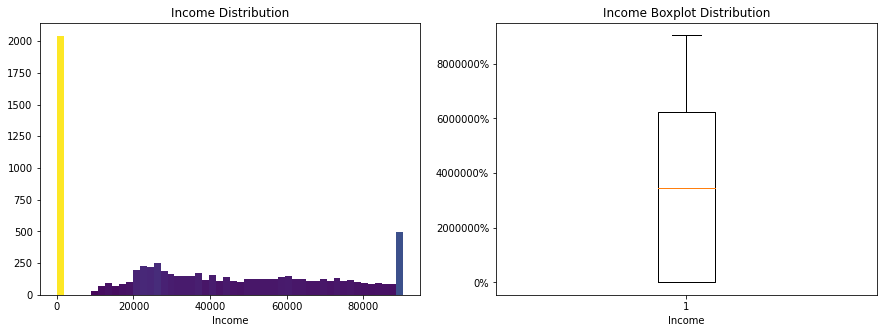

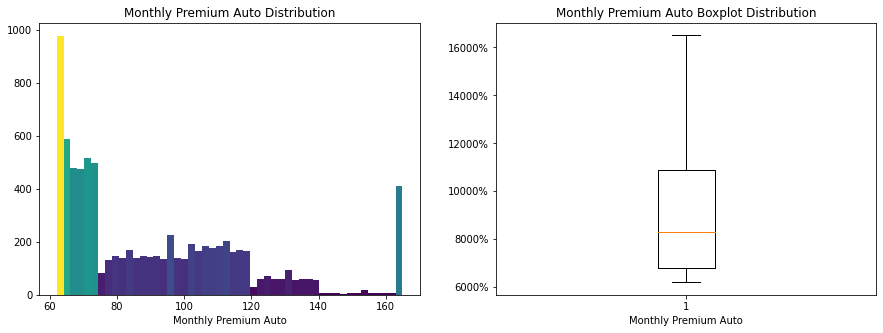

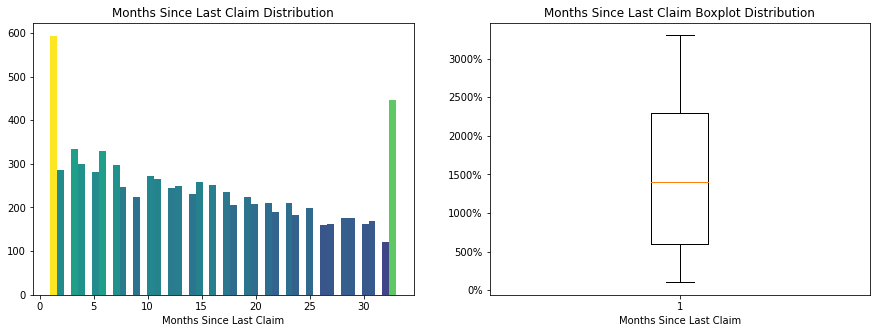

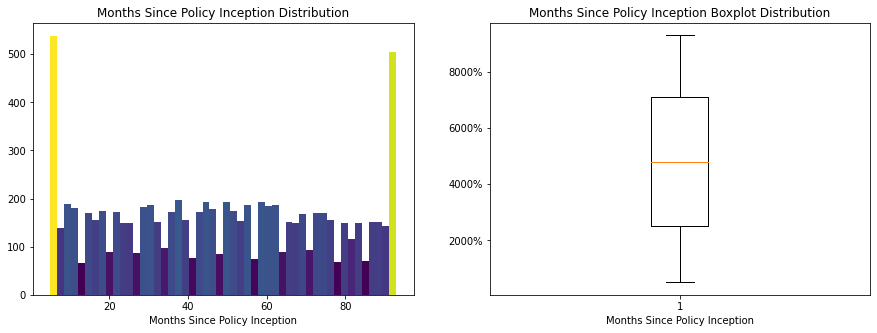

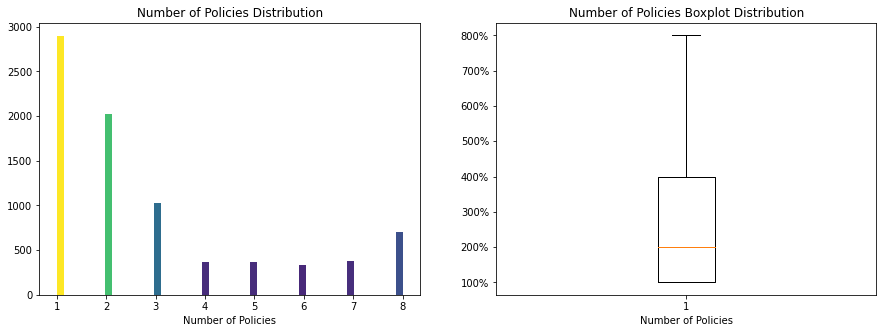

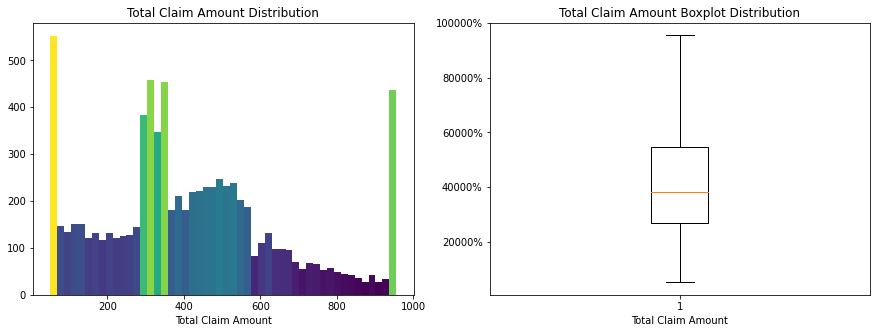

In [ ]:
for col in num_cols:
  # tampilkan semua kolom numerik berdasrkan perulangan for
  histo_boxplot(usecase_df, col)
  print('\n')


### Categorical Data Exploration

In [ ]:
cat_cols = usecase_df.select_dtypes(include='object')

for col in cat_cols:
    print(f'''Value count kolom {col}:''')
    print(cat_cols[col].value_counts())
    print()

Value count kolom Customer:
BU79786    1
FY30870    1
WH76688    1
TH59993    1
CG92708    1
          ..
XX89213    1
BQ51616    1
DW86238    1
BV69462    1
GW42895    1
Name: Customer, Length: 8099, dtype: int64

Value count kolom State:
Oregon        2475
California    2376
Arizona       1640
Nevada         842
Washington     766
Name: State, dtype: int64

Value count kolom Response:
No     6926
Yes    1173
Name: Response, dtype: int64

Value count kolom Coverage:
Basic       4931
Extended    2440
Premium      728
Name: Coverage, dtype: int64

Value count kolom Education:
Bachelor                2430
College                 2369
High School or Below    2339
Master                   648
Doctor                   313
Name: Education, dtype: int64

Value count kolom Effective To Date:
1/10/2011    174
1/27/2011    173
1/31/2011    164
1/3/2011     162
1/17/2011    160
2/14/2011    160
1/19/2011    158
1/5/2011     156
2/27/2011    154
1/26/2011    153
1/20/2011    152
2/19/2011    151
2

In [ ]:
# memeriksa distribusi kolom kategorikal yang mempengaruhi 
def categ_countplot(df, col):
		# visualsiasi value count tiap kolom kategorikal
    plt.figure(figsize=(18,6))
    ax = sns.countplot(x=col, data=df)
    # buat anotasi dengan ax.patches
    for pat in ax.patches:
        ax.annotate(format((pat.get_height()/5630)*100,'.2f'), (pat.get_x() + pat.get_width()/2., pat.get_height()),\
                    ha='center',va='center',size=10,xytext=(0, -10),textcoords='offset points')
    plt.title('Distribution Count of ' + col)

# visualisasi bivariate antar categorical features dengan numeric label
def bivariate_swarmplot(df, col):
      # visualsiasi value count tiap kolom kategorikal
      plt.figure(figsize=(5,8))
      # menggunakan distplot style : palette='rainbow'
      ax = sns.swarmplot(x=col, y='Customer Lifetime Value', data=df)
      plt.title(col + '\'s Effect on Customer Lifetime Value')

In [ ]:
categ_dist = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 
              'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
              'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 
              'Number of Open Complaints']

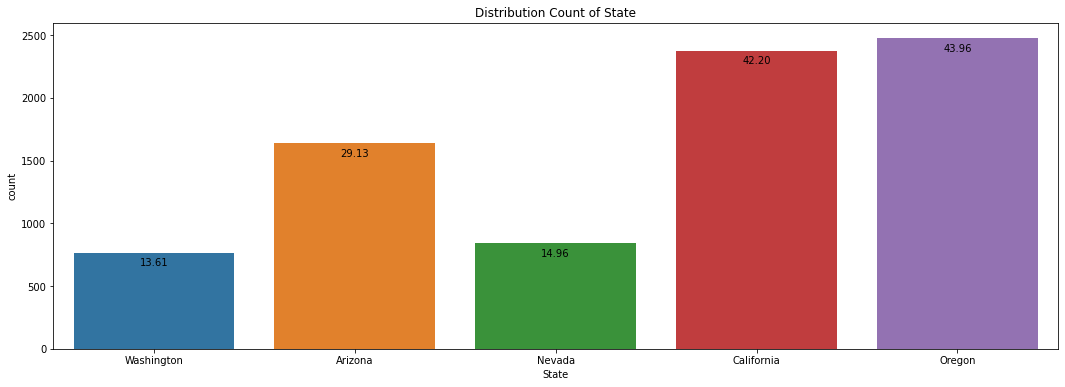

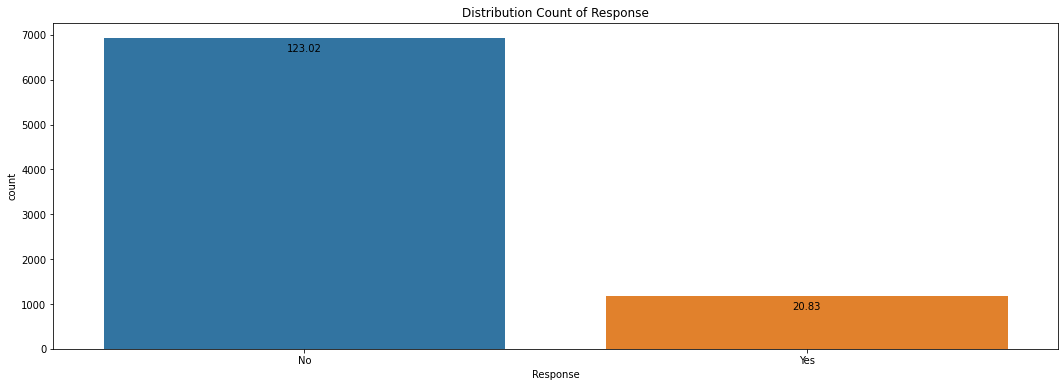

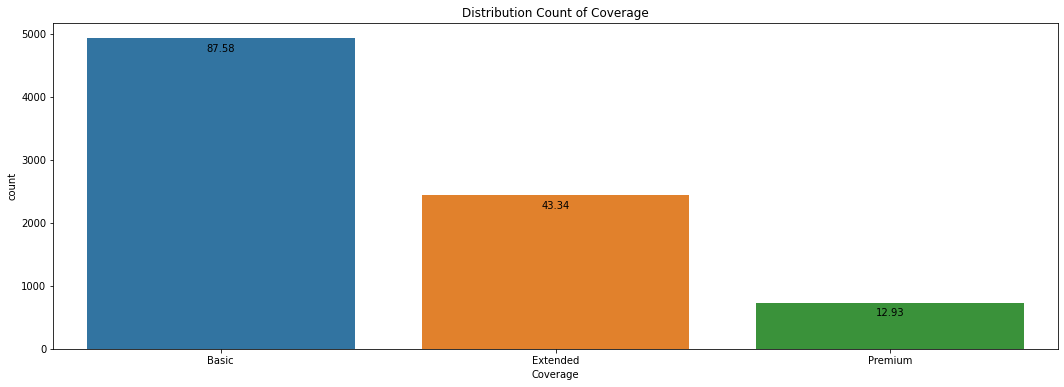

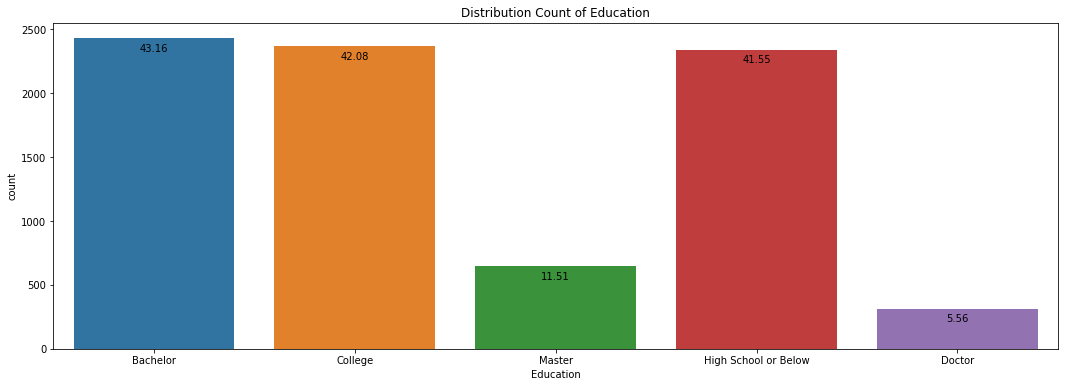

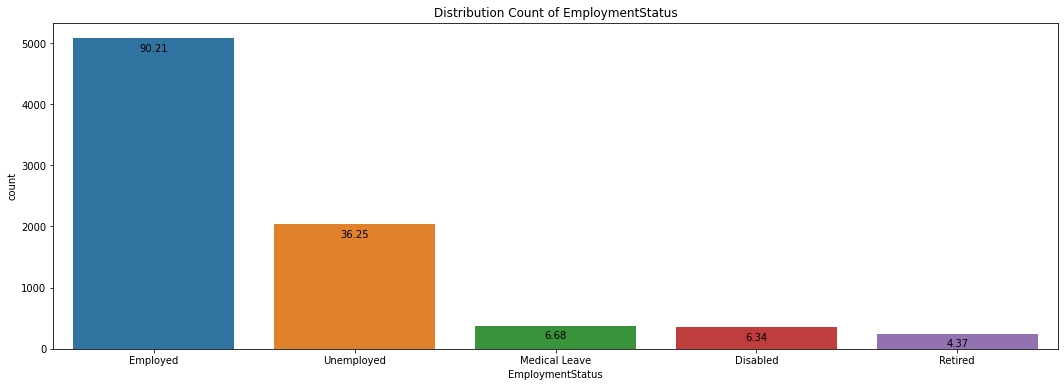

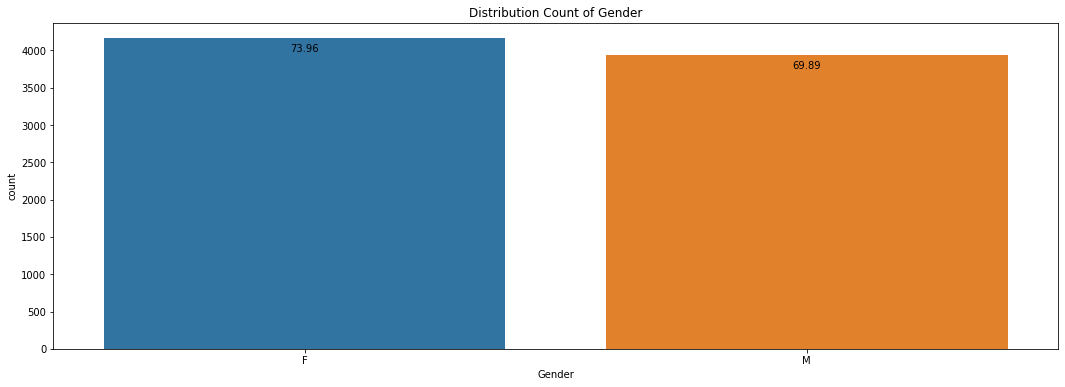

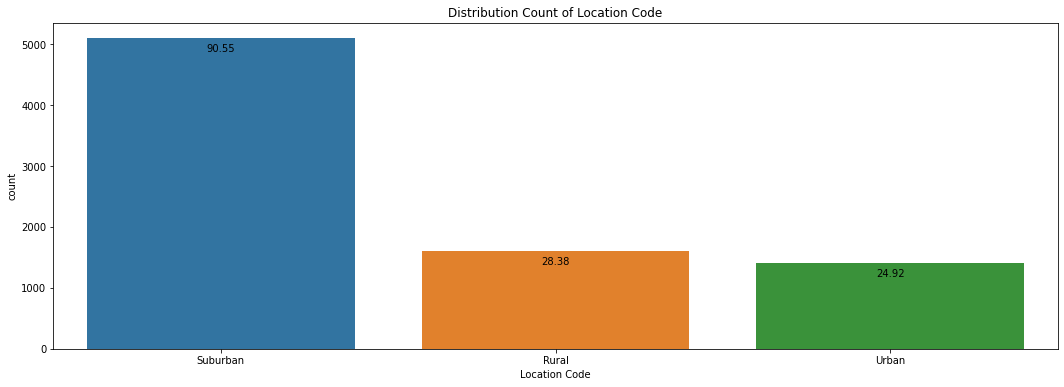

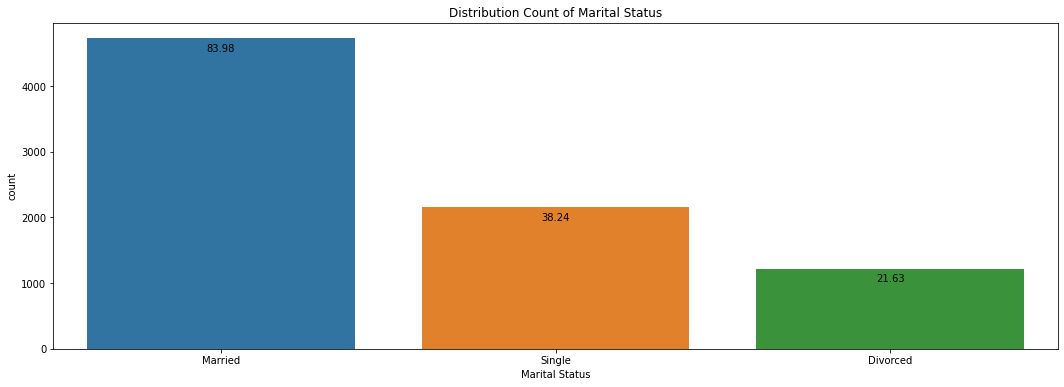

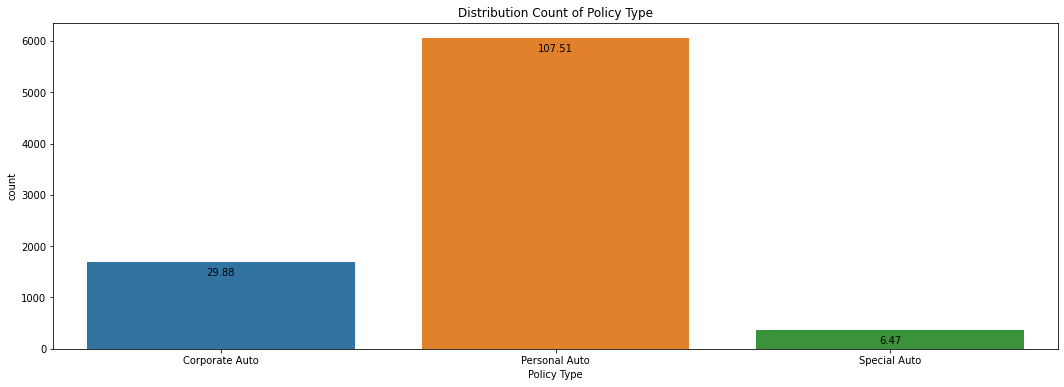

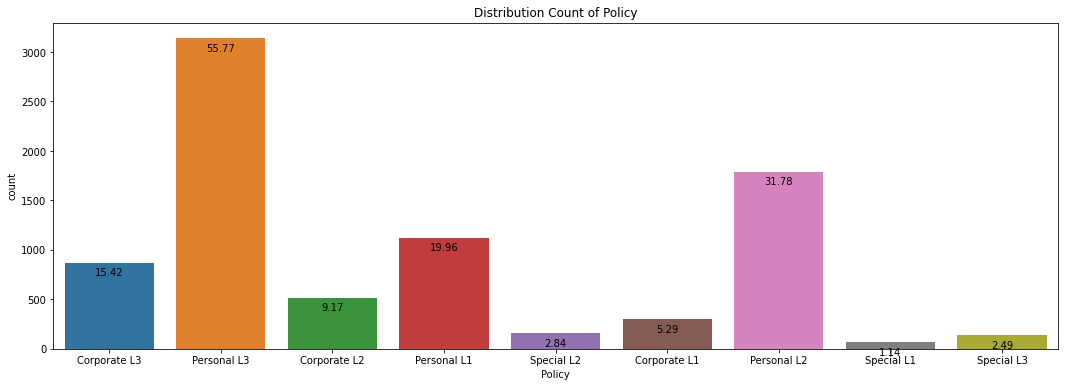

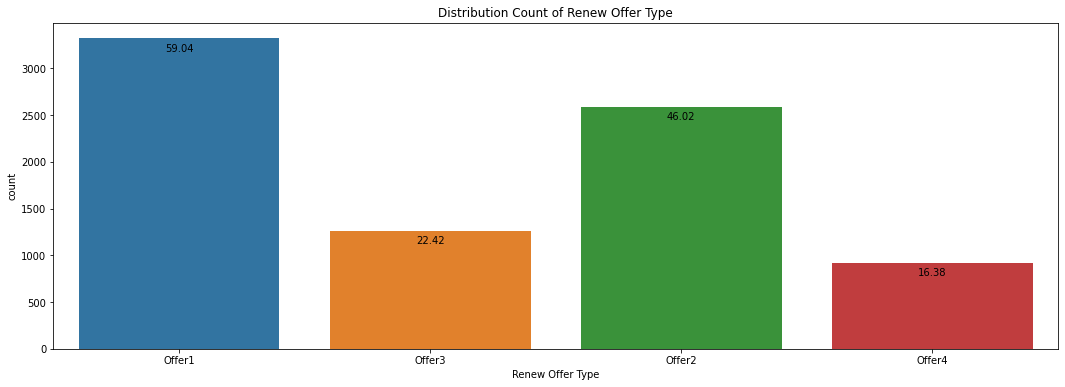

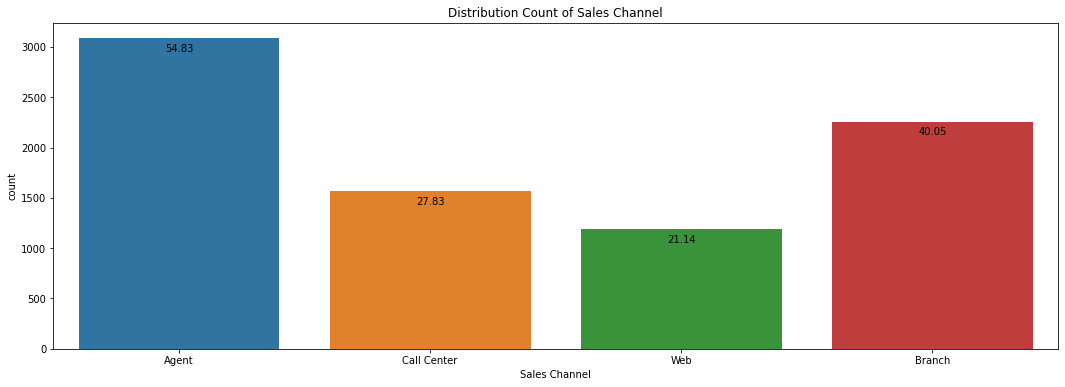

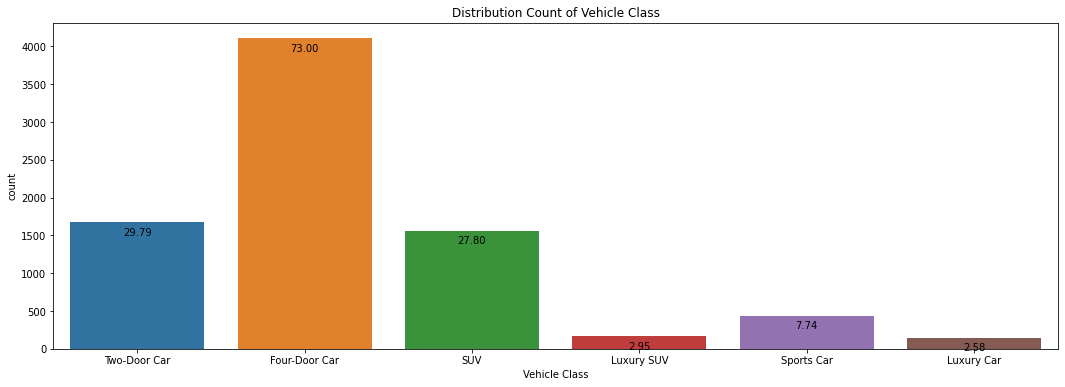

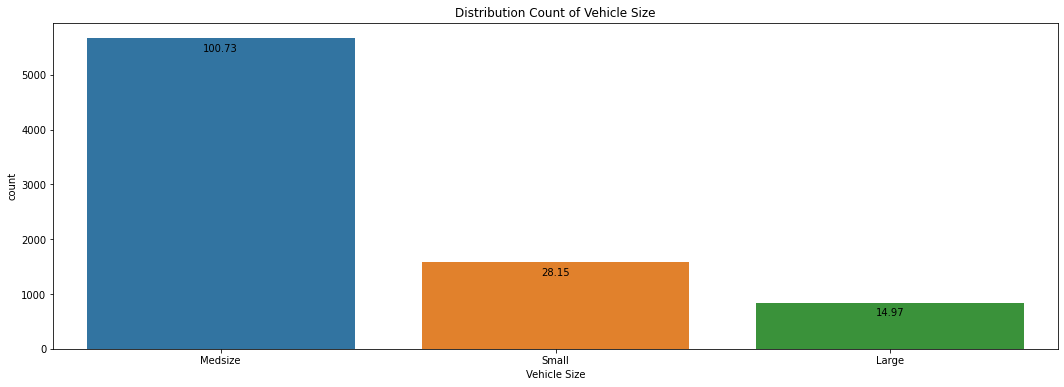

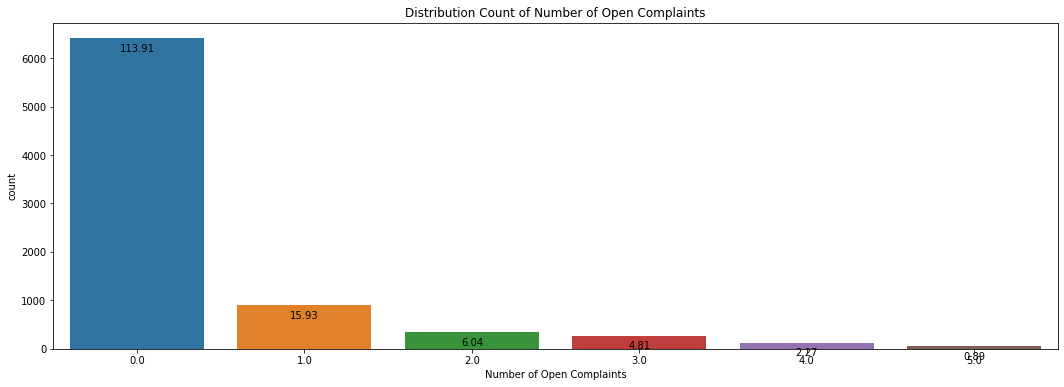

In [ ]:
for col in categ_dist: 
    categ_countplot(usecase_df,col)

### Bivariate Analysis Label - Numeric
`Income` dan `Monthly Premium Auto` dengan `Customer Lifetime Value` 

Before jump into Customer Lifetime Value Approach, Let's find out and understand which affect the Customer become High Value for the Company, How much customer spent? how many product and services that he/she consumed? What is the Behaviour Looks like? Let's Check it out

Began by the Customer's Income which the Distribution are relatively, in general as the Customer's Income Higher  Customer Lifetime Value Higher as Well. But in fact based on the Scatter Chart that the Highest Value Customer Reach when it reach only at 60.000, more income at 70.000 the Lifetime Value getting Lower till the Highest Income at 100.000. How about the spent? How many spent that customer capable according their income?
Does higher income customer will give the Higher spent? Does Customer Spent will increase as the Income getting Higher linearity? 

Next to Monthly Premium Auto, it shows Positive Trend between Monthly Premium Auto that Affect the Customer Lifetime Value. Monthly Premium Auto means which the customer always being Premium because the payment for Premium Subscription has been Automated, that can generate monthly income from each customer who want to stick to be premium give revenue until profit the Company. 

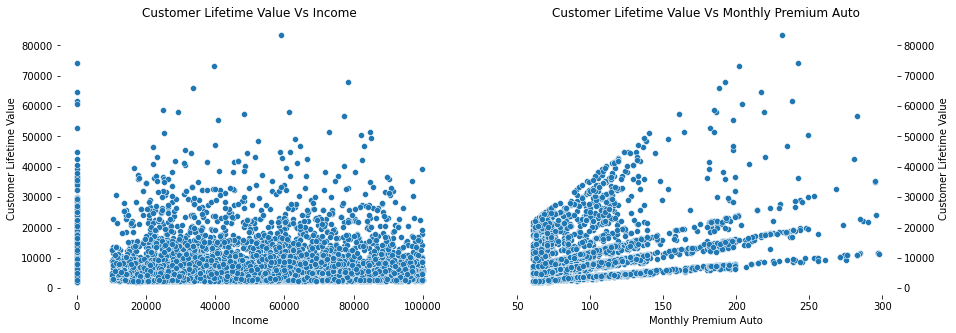

In [ ]:
scatter_bivariate(usecase_df, 'Income', 'Monthly Premium Auto')

`Months Since Last Claim` dan `Months Since Policy Inception` dengan `Customer Lifetime Value` 

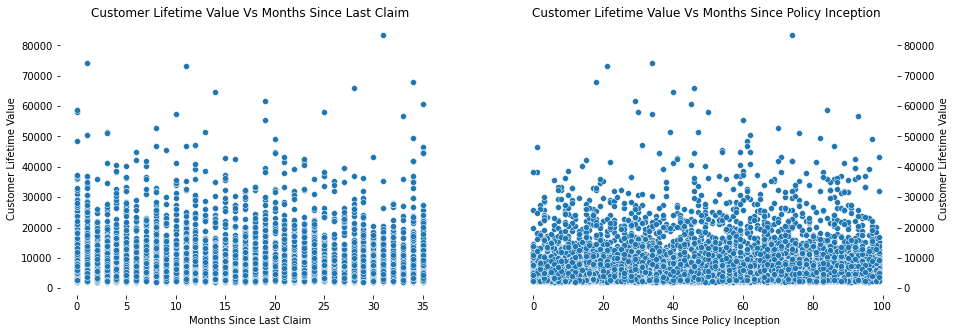

In [ ]:
scatter_bivariate(usecase_df, 'Months Since Last Claim', 'Months Since Policy Inception')

`Total Claim Amount` dan `Number of Open Complaints` dengan `Customer Lifetime Value` 

Let's take a look at Total Claim Amount. Total Claim Amount means total of payable at the maturity of an insurance policy for each customer insured to the beneficiary or the nominee or the legal heir of the insured. It show the Positive trend between Customer Lifetime Value and Total Claim Amount from Cutomer, should be clear that more insurance payment from every customer generate income as many payment given by customer.



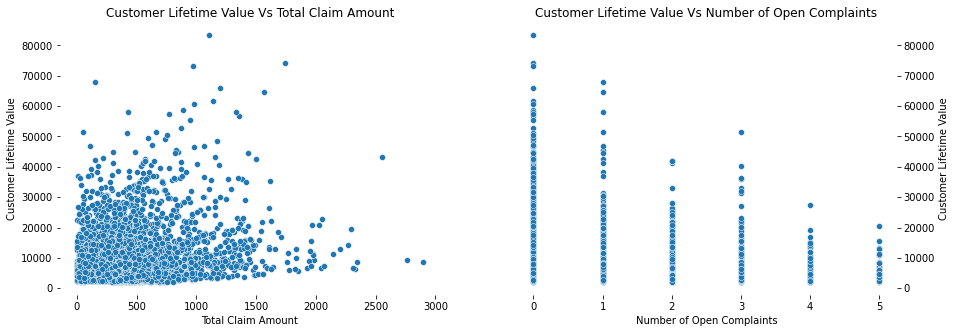

In [ ]:
scatter_bivariate(usecase_df, 'Total Claim Amount', 'Number of Open Complaints')

### Bivariate Analysis Label - Category


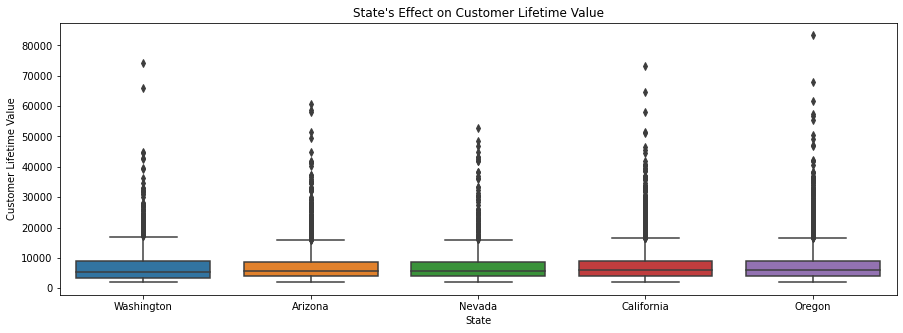

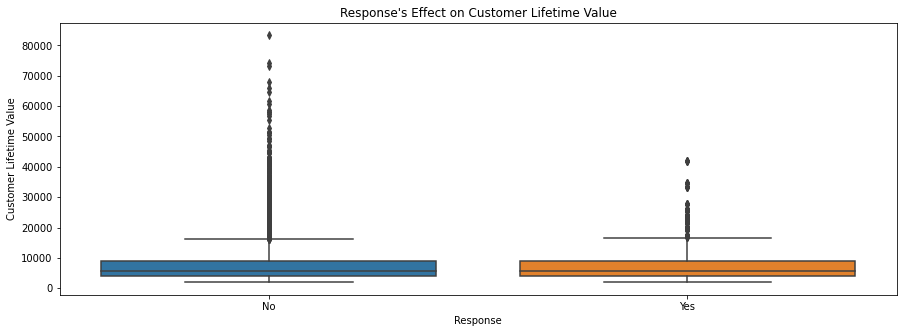

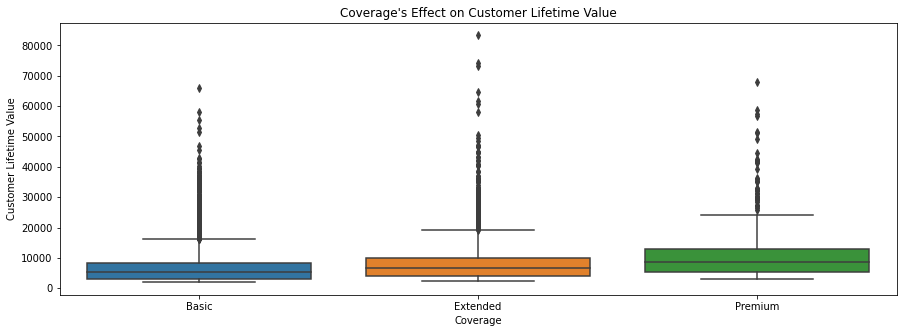

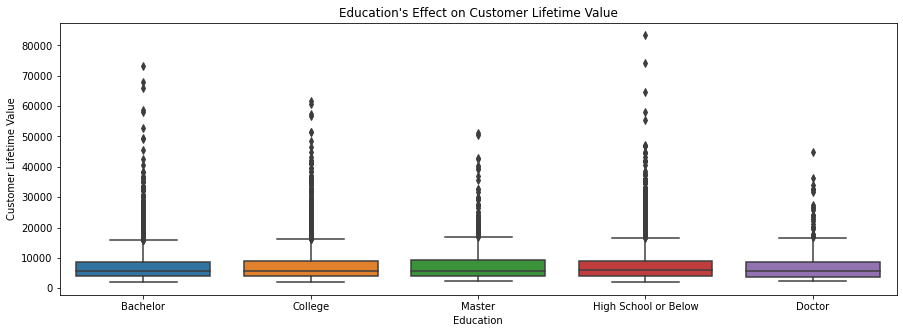

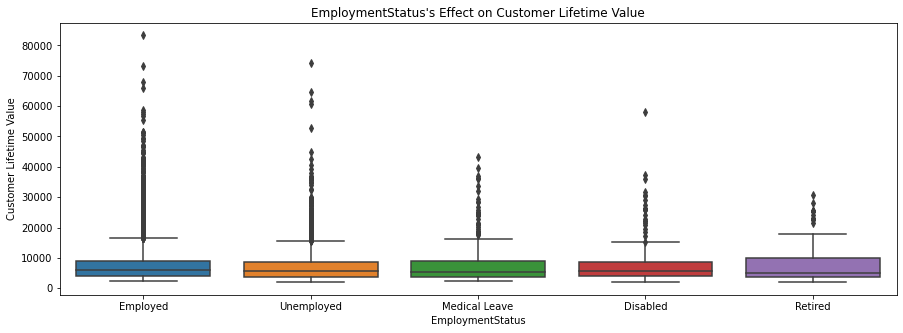

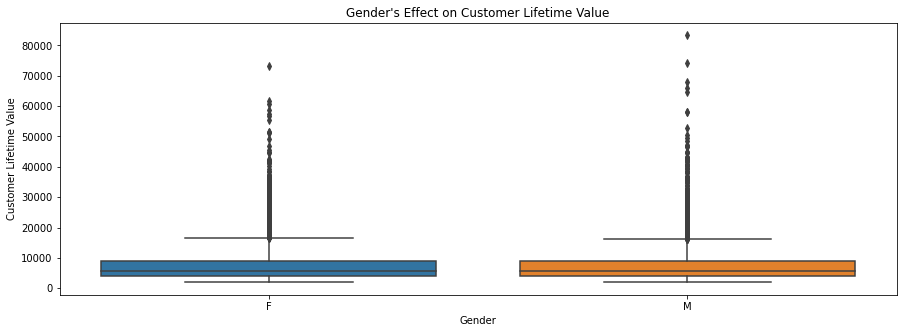

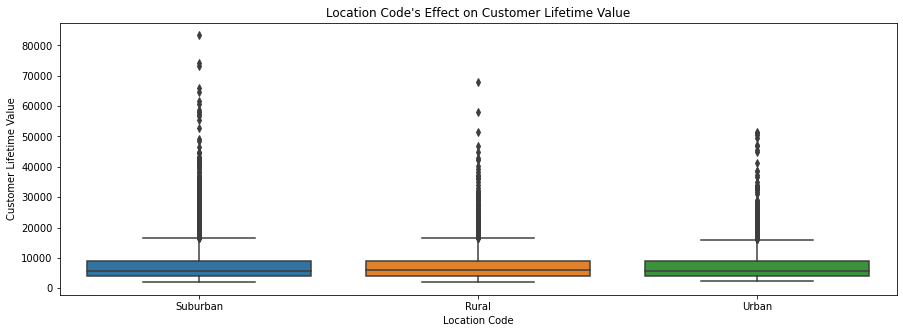

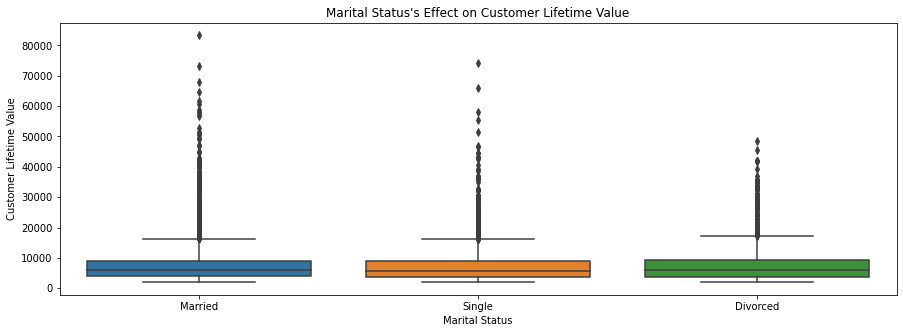

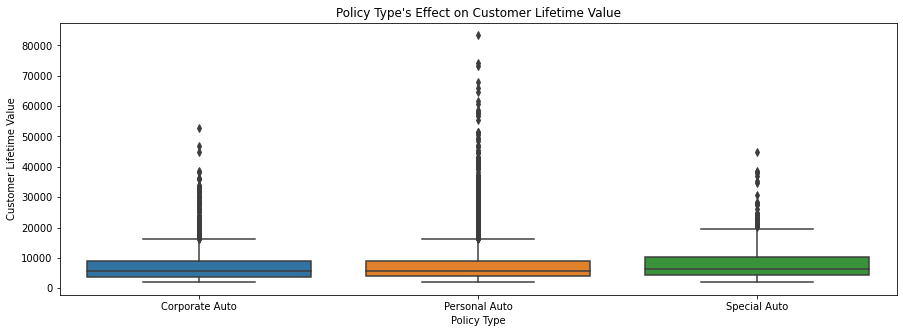

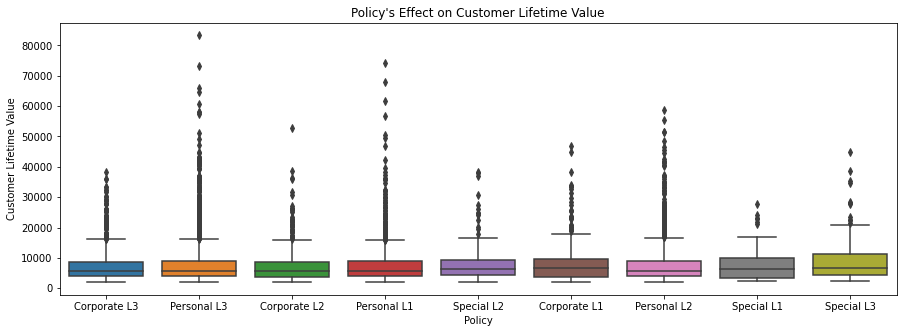

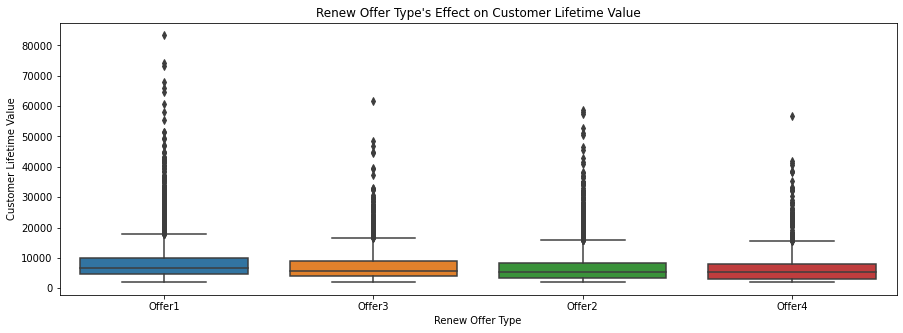

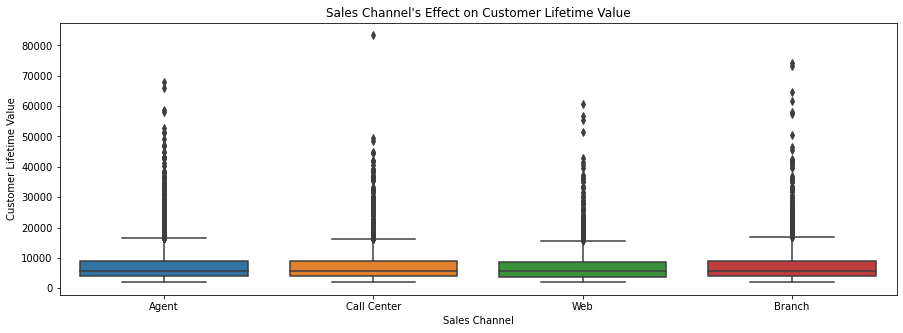

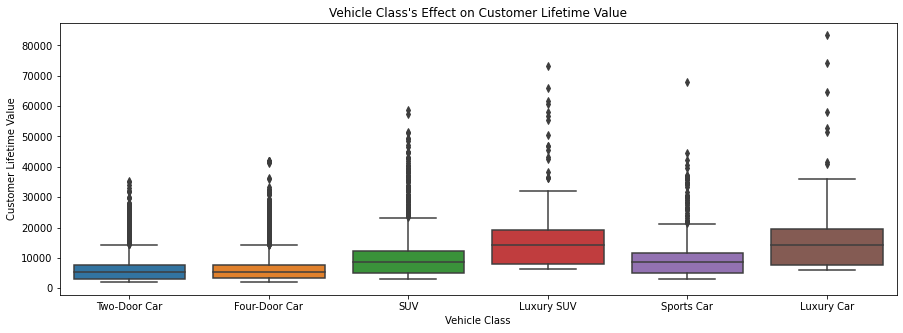

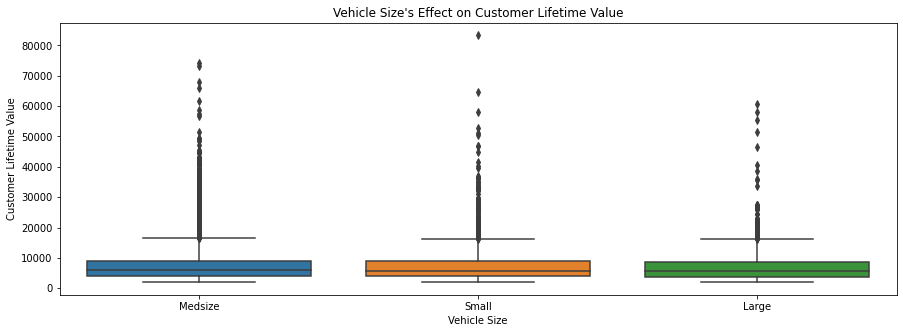

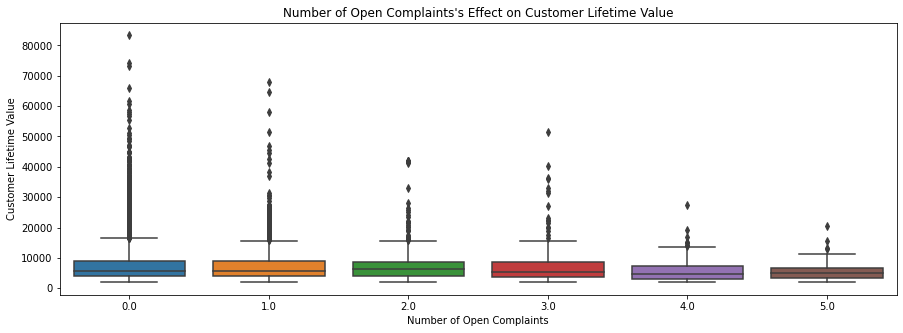

In [ ]:
# plot all categorical variabel to bivariate analysis
for col in categ_dist: 
    plt.figure(figsize=(15,5))
    # menggunakan distplot style : palette='rainbow'
    ax = sns.boxplot(x=col, y='Customer Lifetime Value', data=usecase_df)
    plt.title(col + '\'s Effect on Customer Lifetime Value')

### Multivariate Analysis with Analysis

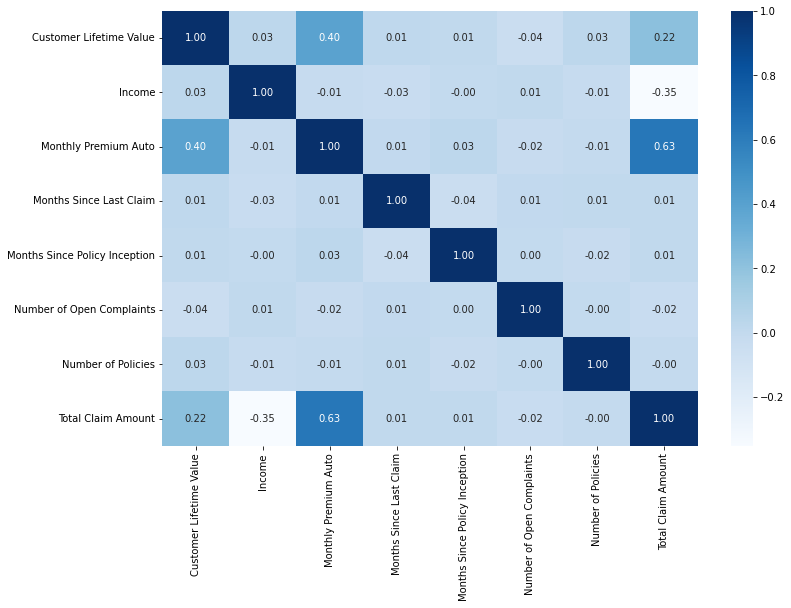

In [ ]:
# multivariate correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(usecase_df.corr(), annot=True, fmt='.2f', cmap='Blues')

Correlation khusus untuk *Customer Lifetime Value*, *Income*, *Monthly Premium Auto* dan *Total Claim Amount* sebagai 4 besar

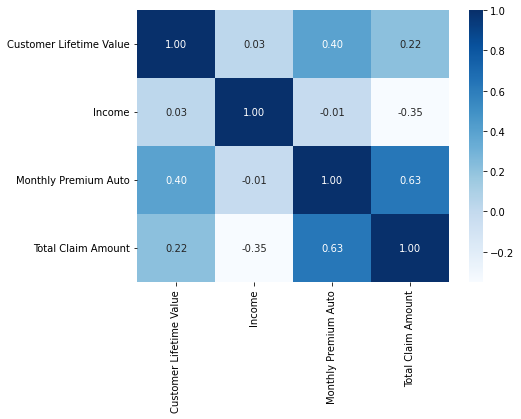

In [ ]:
# pilih fitur yang 4 besar
top_features = usecase_df[['Customer Lifetime Value', 'Income', 
                           'Monthly Premium Auto', 'Total Claim Amount']]

# visualisasi heatmap
plt.figure(figsize = (7, 5))
sns.heatmap(top_features.corr(), annot=True, fmt='.2f', cmap='Blues')

## Data Preprocessing

### Categorical Column Encoding

In [ ]:
# call label encoder function into object
labelencode = LabelEncoder()

# run label encoding to each categorical column
for col in cat_cols:
    # fit categoricial column
    labelencode.fit(usecase_df[col])
    usecase_df[col] = labelencode.fit_transform(usecase_df[col])

# display the result
usecase_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,517,4,2763.519279,0,0,0,47,1,0,56274.0,...,5.0,0.0,1.0,0,2,0,0,384.811147,5,1
1,5243,0,6979.535903,0,1,0,24,4,0,0.0,...,42.0,0.0,8.0,1,5,2,0,1131.464935,0,1
2,81,2,12887.431650,0,2,0,41,1,0,48767.0,...,38.0,0.0,2.0,1,5,0,0,566.472247,5,1
3,7106,1,7645.861827,0,0,0,12,4,1,0.0,...,65.0,0.0,7.0,0,1,0,2,529.881344,3,1
4,2179,4,2813.692575,0,0,0,52,1,1,43836.0,...,44.0,0.0,1.0,1,3,0,0,138.130879,0,1


### Numerical Column Scaling

In [ ]:
# call minmax scaler function into object
# minmax_scale = MinMaxScaler()



### Check Correlation after Label Encoding

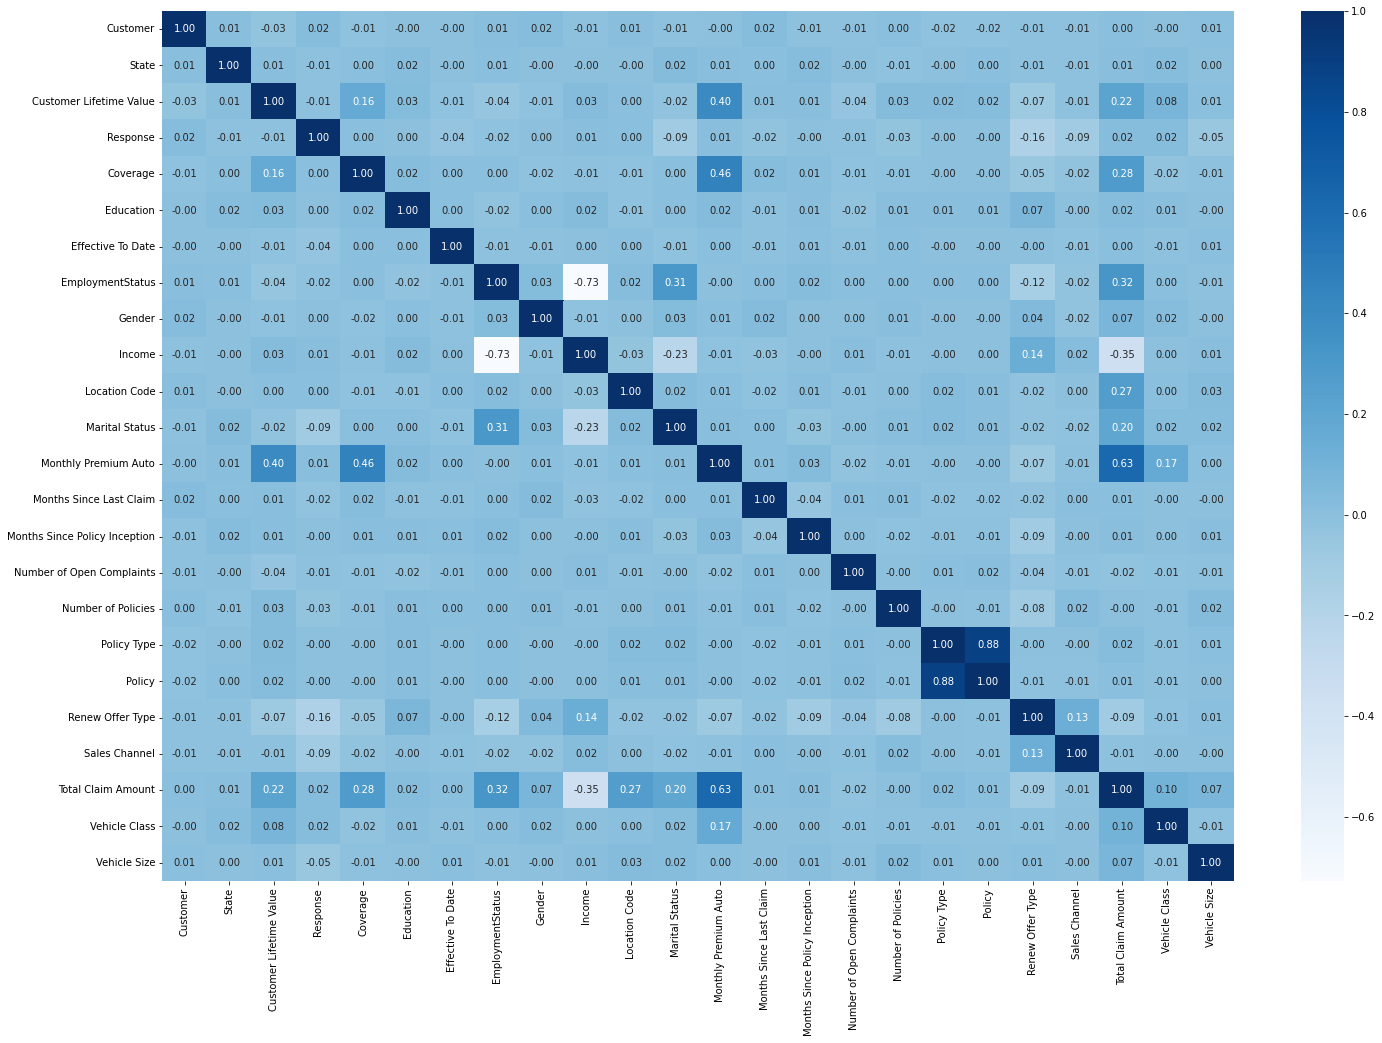

In [ ]:
# multivariate correlation heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(usecase_df.corr(), annot=True, fmt='.2f', cmap='Blues')

## Data Modelling

### Train Test Split

In [ ]:
# split data into feature and target
X = usecase_df.drop(['Customer Lifetime Value', 'Policy Type', 'Policy', 'Income'], axis=1)
y = usecase_df['Customer Lifetime Value']
y = np.log(y)

# test size 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# view train and test shape
print(f"""X train Shape : {X_train.shape}
y train Shape : {y_train.shape}
X test Shape : {X_test.shape}
y test Shape : {y_test.shape}""")

X train Shape : (5669, 20)
y train Shape : (5669,)
X test Shape : (2430, 20)
y test Shape : (2430,)


### Model Training and Evaluation

In [ ]:
# Linear Regression
lireg = LinearRegression()

lireg.fit(X_train, y_train)
lreg_pred = lireg.predict(X_test)
 
print(f"""Linear Regression
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, lreg_pred))}
Mean Absoulte Error     : {mean_absolute_error(y_test, lreg_pred)}
R-Squared               : {r2_score(y_test, lreg_pred)}""")

Linear Regression
Root Mean Squared Error : 0.5735059008812777
Mean Absoulte Error     : 0.44541270849106523
R-Squared               : 0.2469111860269565


In [ ]:
# Ridge Regression
ridreg = RidgeCV(alphas=[1, 0.1, 0.01, 0.005], normalize=True)

ridreg.fit(X_train, y_train)
rid_pred = ridreg.predict(X_test)

print(f"""Ridge Regression
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, rid_pred))}
Mean Absoulte Error     : {mean_absolute_error(y_test, rid_pred)}
R-Squared               : {r2_score(y_test, rid_pred)}""")

Ridge Regression
Root Mean Squared Error : 0.5735729864772908
Mean Absoulte Error     : 0.4454334977052715
R-Squared               : 0.24673499126865217


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
# Lasso Regression
lareg = LassoCV(alphas=[1, 0.1, 0.01, 0.005], random_state=1)
lareg.fit(X_train, y_train)
las_pred = lareg.predict(X_test)

print(f"""Lasso Regression
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, las_pred))}
Mean Absoulte Error     : {mean_absolute_error(y_test, las_pred)}
R-Squared               : {r2_score(y_test, las_pred)}""")

Lasso Regression
Root Mean Squared Error : 0.5729956297968255
Mean Absoulte Error     : 0.4446397192724363
R-Squared               : 0.2482506961900649


In [ ]:
# Decision Tree Regression
dtreg = DecisionTreeRegressor(random_state=1)
dtreg.fit(X_train, y_train)
dtr_pred = dtreg.predict(X_test)

print(f"""Decision Tree Regression
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, dtr_pred))}
Mean Absoulte Error     : {mean_absolute_error(y_test, dtr_pred)}
R-Squared               : {r2_score(y_test, dtr_pred)}""")

Decision Tree Regression
Root Mean Squared Error : 0.2667768697563509
Mean Absoulte Error     : 0.10841227156233219
R-Squared               : 0.8370453491258252


In [ ]:
# Random Forest Regression
rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)
rfr_pred = rfreg.predict(X_test)

print(f"""Random Forest Regression
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, rfr_pred))}
Mean Absoulte Error     : {mean_absolute_error(y_test, rfr_pred)}
R-Squared               : {r2_score(y_test, rfr_pred)}""")

Random Forest Regression
Root Mean Squared Error : 0.19595860887465583
Mean Absoulte Error     : 0.09399664622658559
R-Squared               : 0.9120776857825181


In [ ]:
rfr_pred[:10]

array([9.29128077, 9.85562665, 9.66121771, 8.83610805, 8.51399154,
       8.03412537, 8.74508594, 8.88901564, 8.53445968, 9.86402926])

### Feature Importance

In [ ]:
pd.DataFrame(rfreg.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.675313
Monthly Premium Auto,0.227745
Total Claim Amount,0.011989
Effective To Date,0.011451
Months Since Policy Inception,0.011088
Months Since Last Claim,0.010871
Customer,0.010538
EmploymentStatus,0.006918
Education,0.004689
Coverage,0.004329


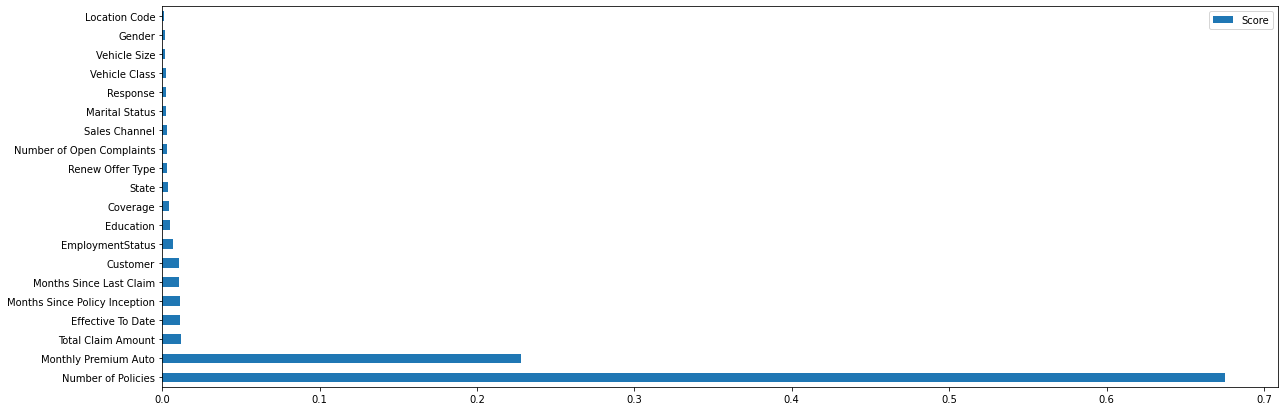

In [ ]:
pd.DataFrame(rfreg.feature_importances_,index=X.columns,columns=['Score']
             ).sort_values("Score",ascending=False).plot(kind='barh',figsize=(20,7))
plt.show()

## Model Inference

In [ ]:
# liat isi data dengan 5 baris teratas
realcase_df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,FH77504,California,Yes,Premium,Bachelor,1/24/2011,Employed,F,51643,Suburban,...,43,0,1,Personal Auto,Personal L3,Offer2,Agent,1358.400000,Luxury Car,Medsize
1,XK87182,Oregon,No,Premium,College,1/25/2011,Employed,F,46402,Urban,...,2,0,1,Personal Auto,Personal L3,Offer1,Agent,476.385575,Four-Door Car,Medsize
2,HB17438,Washington,No,Extended,Bachelor,2/21/2011,Employed,M,92044,Urban,...,77,0,3,Personal Auto,Personal L1,Offer4,Web,617.288574,SUV,Medsize
3,DH18269,Arizona,No,Extended,College,1/13/2011,Medical Leave,M,16040,Suburban,...,93,0,2,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize
4,DP19820,Oregon,No,Extended,College,1/15/2011,Unemployed,M,0,Suburban,...,84,4,2,Personal Auto,Personal L2,Offer2,Branch,980.528170,SUV,Small


In [ ]:
# liat jumlah baris dan kolom
realcase_df.shape

(1035, 23)

In [ ]:
# liat info dari dataset, datatype, jumlah non-null
realcase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       1035 non-null   object 
 1   State                          1035 non-null   object 
 2   Response                       1035 non-null   object 
 3   Coverage                       1035 non-null   object 
 4   Education                      1035 non-null   object 
 5   Effective To Date              1035 non-null   object 
 6   EmploymentStatus               1035 non-null   object 
 7   Gender                         1035 non-null   object 
 8   Income                         1035 non-null   int64  
 9   Location Code                  1035 non-null   object 
 10  Marital Status                 1035 non-null   object 
 11  Monthly Premium Auto           1035 non-null   int64  
 12  Months Since Last Claim        1035 non-null   i

In [ ]:
# liat jumlah data kosong perbaris dari tiap kolom
realcase_df.isnull().sum()

Customer                         0
State                            0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
# liat jumlah data duplicate perbaris dari tiap kolom
realcase_df[realcase_df.duplicated()].count()

Customer                         0
State                            0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
# liat statistika deskriptif, secara default numerik
realcase_df.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,36200.622222,93.833816,15.296618,47.415459,0.346860,2.984541,454.624993
std,30428.327030,34.627633,9.970359,28.584926,0.879861,2.389887,318.034652
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,2.823303
25%,0.000000,69.000000,6.000000,22.000000,0.000000,1.000000,290.680278
50%,30064.000000,85.000000,14.000000,47.000000,0.000000,2.000000,390.498822
75%,60926.000000,110.000000,24.000000,72.000000,0.000000,4.000000,561.600000
max,99845.000000,286.000000,35.000000,99.000000,5.000000,9.000000,2452.894264


In [ ]:
# liat statistika deskriptif pada data kategorikal
realcase_df.describe(include=[object])

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035
unique,1035,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,FH77504,California,No,Basic,Bachelor,1/26/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize
freq,1,774,900,637,318,28,619,541,681,570,735,333,428,390,511,753


### Konversi kolom Kategorikal menjadi Numerik

In [ ]:
X_real = realcase_df.copy()

# run label encoding to each categorical column
for col in cat_cols:
    # fit categoricial column
    labelencode.fit(X_real[col])
    X_real[col] = labelencode.fit_transform(X_real[col])

# display the result
X_real.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,233,1,1,2,0,16,1,0,51643,1,...,43,0,1,1,5,1,0,1358.400000,1,1
1,934,3,0,2,1,17,1,0,46402,2,...,2,0,1,1,5,0,0,476.385575,0,1
2,308,4,0,1,0,44,1,1,92044,2,...,77,0,3,1,3,3,3,617.288574,3,1
3,152,0,0,1,1,4,2,1,16040,1,...,93,0,2,1,5,0,1,611.476898,5,1
4,168,3,0,1,1,6,4,1,0,1,...,84,4,2,1,4,1,1,980.528170,3,2


### Jalankan Prediksi dari model pada data baru

In [ ]:
X_real.drop(['Policy Type', 'Policy', 'Income'], axis=1, inplace=True)

predict_clv = rfreg.predict(X_real)
predict_clv[:10]

array([9.30756285, 8.40433301, 9.2582507 , 9.72878223, 9.90890737,
       8.40275375, 8.84386693, 8.55443765, 8.9637624 , 9.20826063])

In [ ]:
realcase_df['Customer Lifetime Value'] = predict_clv
realcase_df.head(25)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,FH77504,California,Yes,Premium,Bachelor,1/24/2011,Employed,F,51643,Suburban,...,0,1,Personal Auto,Personal L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,9.307563
1,XK87182,Oregon,No,Premium,College,1/25/2011,Employed,F,46402,Urban,...,0,1,Personal Auto,Personal L3,Offer1,Agent,476.385575,Four-Door Car,Medsize,8.404333
2,HB17438,Washington,No,Extended,Bachelor,2/21/2011,Employed,M,92044,Urban,...,0,3,Personal Auto,Personal L1,Offer4,Web,617.288574,SUV,Medsize,9.258251
3,DH18269,Arizona,No,Extended,College,1/13/2011,Medical Leave,M,16040,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize,9.728782
4,DP19820,Oregon,No,Extended,College,1/15/2011,Unemployed,M,0,Suburban,...,4,2,Personal Auto,Personal L2,Offer2,Branch,980.528170,SUV,Small,9.908907
5,IK64989,Washington,Yes,Basic,Bachelor,1/2/2011,Retired,M,17622,Suburban,...,1,3,Personal Auto,Personal L2,Offer1,Agent,312.000000,Four-Door Car,Medsize,8.402754
6,MP85571,Arizona,No,Premium,Bachelor,2/20/2011,Unemployed,F,0,Suburban,...,4,1,Personal Auto,Personal L2,Offer3,Agent,2156.011022,SUV,Medsize,8.843867
7,VO29645,Oregon,Yes,Basic,High School or Below,2/26/2011,Medical Leave,M,12430,Suburban,...,0,4,Personal Auto,Personal L3,Offer2,Call Center,350.400000,Four-Door Car,Medsize,8.554438
8,GP83239,California,Yes,Extended,College,1/14/2011,Employed,M,58414,Suburban,...,2,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,Luxury SUV,Small,8.963762
9,GQ21970,Nevada,No,Basic,Bachelor,1/28/2011,Disabled,F,17257,Suburban,...,0,2,Personal Auto,Personal L2,Offer1,Call Center,551.132139,Four-Door Car,Small,9.208261


### Prediksi Customer Lifetime Value berdasarkan Monthly Premium Auto

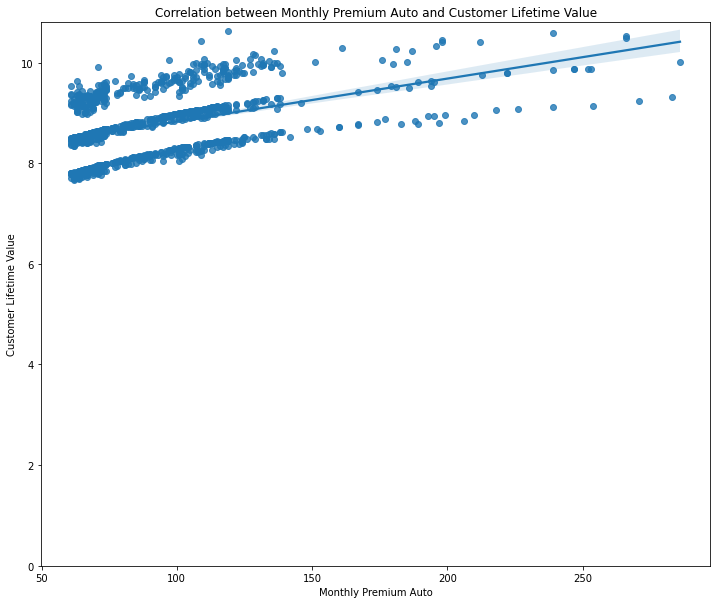

In [ ]:
# plot
plt.figure(figsize=(12, 10))
# replot(<sumbu_x>, <sumbu_y>, <data_yang_ditampilkan>)
sns.regplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=realcase_df)
plt.ylim(0,);
# judul
plt.title("Correlation between Monthly Premium Auto and Customer Lifetime Value");

### Prediksi Customer Lifetime Value berdasarkan Number of Policies

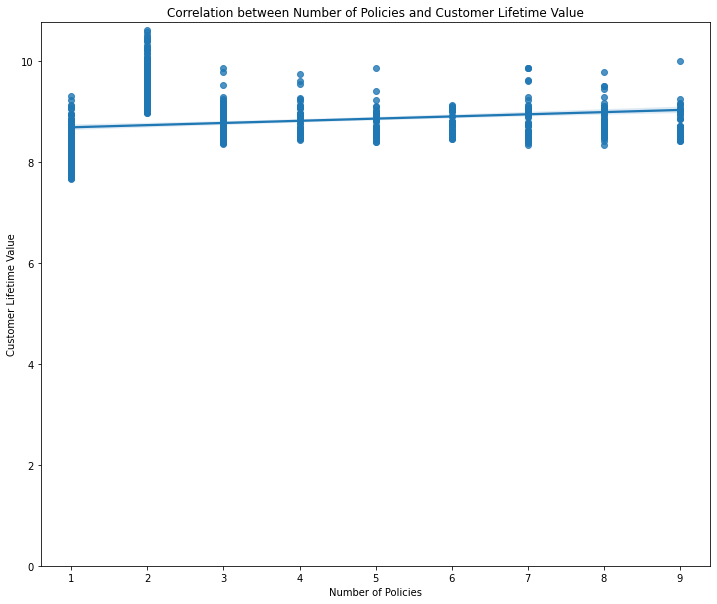

In [ ]:
# plot
plt.figure(figsize=(12, 10))
# replot(<sumbu_x>, <sumbu_y>, <data_yang_ditampilkan>)
sns.regplot(x="Number of Policies", y="Customer Lifetime Value", data=realcase_df)
plt.ylim(0,);
# judul
plt.title("Correlation between Number of Policies and Customer Lifetime Value");